In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sci

In [11]:
file_name = "../src/"+input("Podaj nazwe pliku z danymi: ")

#file_name = "..\\src\\"+input("Podaj nazwe pliku z danymi: ")
data_frame = pd.read_csv(file_name,sep="\s+",header=None,engine="python")

print(data_frame)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_26186/1227886025.py:4: SyntaxWarning: invalid escape sequence '\s'
  data_frame = pd.read_csv(file_name,sep="\s+",header=None,engine="python")


             0         1
0     0.000000 -0.325000
1     0.002778 -0.273038
2     0.005556 -0.268038
3     0.008333 -0.320000
4     0.011111 -0.391962
...        ...       ...
3196  8.877778 -0.306962
3197  8.880556 -0.316962
3198  8.883333 -0.270000
3199  8.886111 -0.233038
3200  8.888889 -0.233038

[3201 rows x 2 columns]


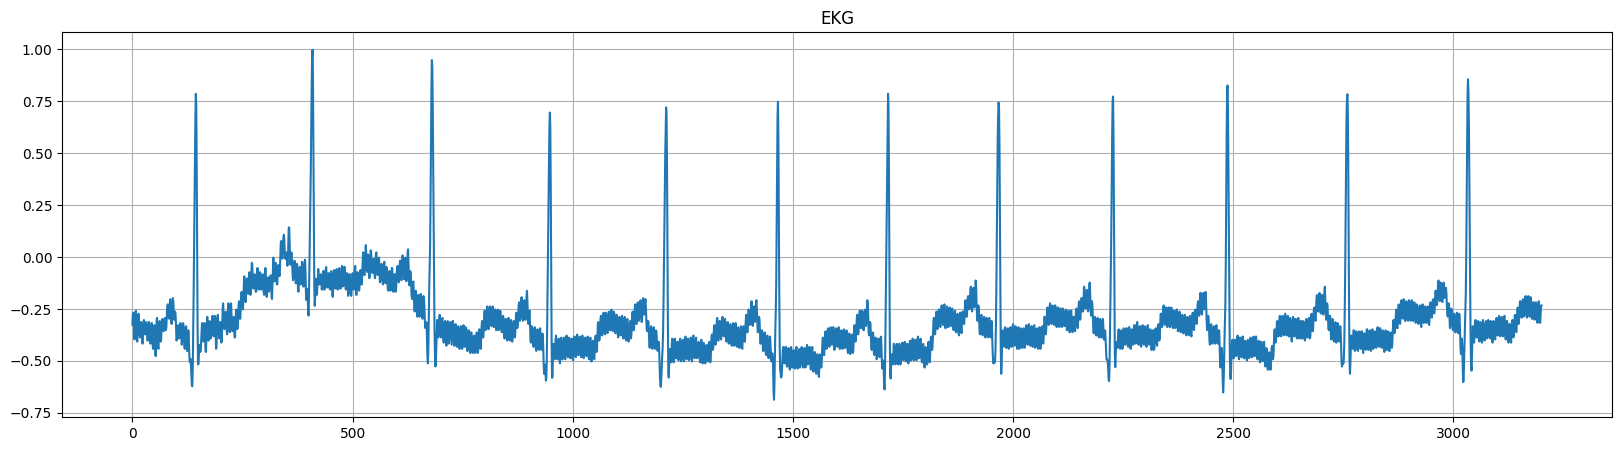

In [12]:
data_frame.columns = ['I','data']
font = {'size':20}
plt.figure(figsize=(20,5))
plt.plot(data_frame['data'])
plt.grid(True)
plt.title("EKG")
plt.show()

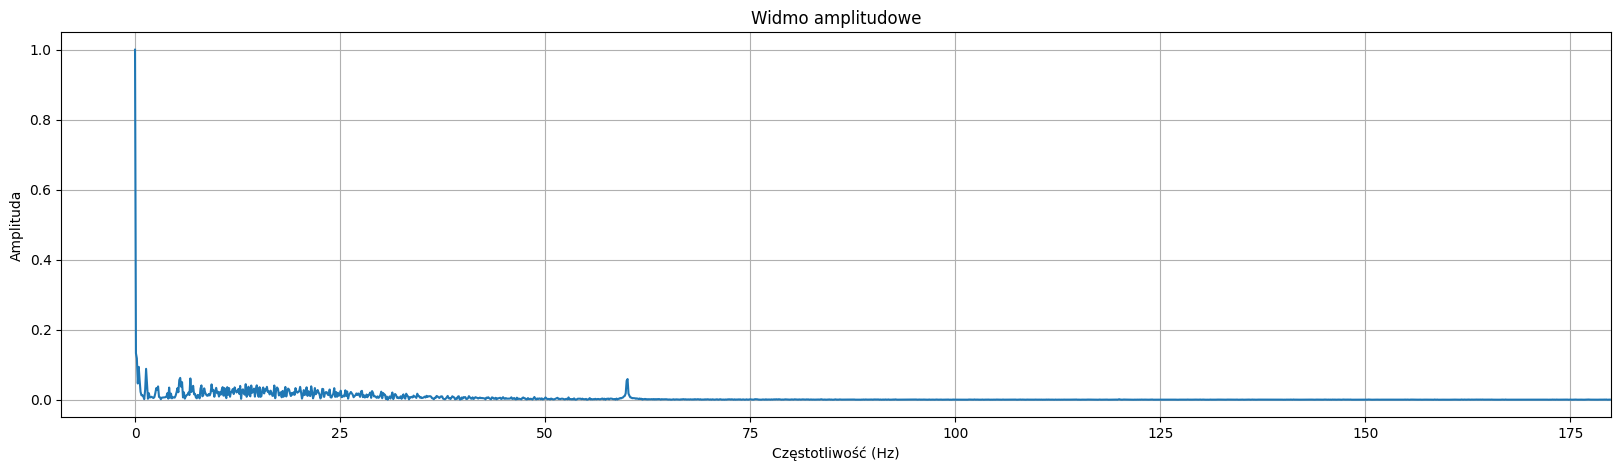

In [13]:

fs = 360
t = len(data_frame)

fourier1 = np.fft.fft(data_frame['data'])

widmo = np.abs(fourier1)
abs_widmo = widmo / np.max(widmo)
freq = np.fft.fftfreq(t,1/fs)
pos_freq = freq[:len(freq)//2]
pos_widmo = abs_widmo[:len(abs_widmo)//2]

plt.figure(figsize=(20,5))
plt.plot(pos_freq,pos_widmo)
plt.xlim(right = fs/2)
plt.grid(True)
plt.title("Widmo amplitudowe")
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')

plt.show()



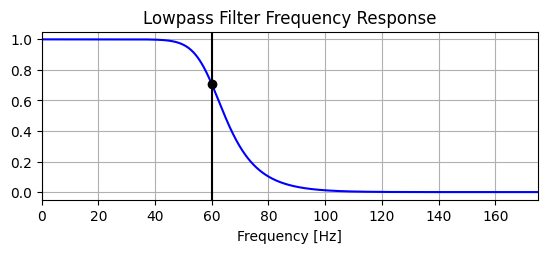

In [ ]:
order = 6
fs = 350
cutoff = 60

b,a = sci.butter(order,cutoff,fs=fs,btype='low',analog=False)

w, h = sci.freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Charakterystyka filtru")
plt.xlabel('Częstotliwość [Hz]')
plt.grid()

b, a = sci.butter_lowpass(cutoff, fs, order=order)
y = sci.lfilter(b, a, data_frame['data'])

